In [1]:
# !pip install pycountry-convert

In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
import geopandas as gpd
import pycountry
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency

import warnings
import matplotlib.pyplot as plt

# 경고 무시 설정
warnings.filterwarnings("ignore")

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arrays\masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


# read_csv

In [3]:
df_distribution_centers = pd.read_csv('./distribution_centers.csv')
df_events = pd.read_csv('./events.csv')
df_inventory_items = pd.read_csv('./inventory_items.csv')
df_order_items = pd.read_csv('./order_items.csv')
df_orders = pd.read_csv('./orders.csv')
df_products = pd.read_csv('./products.csv')
df_users = pd.read_csv('./users.csv')

## columns info

In [4]:
dataframes = [
    ('df_distribution_centers', df_distribution_centers),
    ('df_events', df_events),
    ('df_inventory_items', df_inventory_items),
    ('df_order_items', df_order_items),
    ('df_orders', df_orders),
    ('df_products', df_products),
    ('df_users', df_users)
]

for name, df in dataframes:
    print(f"\nInfo for {name}:\n{df.info()}\n")
    
pd.options.mode.chained_assignment = None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes

Info for df_distribution_centers:
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2431963 entries, 0 to 2431962
Data columns (total 13 columns):
 #   Column           Dtype  
---  ------           -----  
 0   id               int64  
 1   user_id          float64
 2   sequence_number  int64  
 3   session_id       object 
 4   created_at       object 
 5   ip_address       object 
 6   city             object 
 7   state            object 
 8   postal_code      object 
 9   browser          object 
 10  traffic_source   object 
 11  uri              object 
 12  event_type   

## df_distribution_centers

In [5]:
df_distribution_centers

,id,name,latitude,longitude
0,1,Memphis TN,35.1174,-89.9711
1,2,Chicago IL,41.8369,-87.6847
2,3,Houston TX,29.7604,-95.3698
3,4,Los Angeles CA,34.0500,-118.2500
4,5,New Orleans LA,29.9500,-90.0667
5,6,Port Authority of New York/New Jersey NY/NJ,40.6340,-73.7834
6,7,Philadelphia PA,39.9500,-75.1667
7,8,Mobile AL,30.6944,-88.0431
8,9,Charleston SC,32.7833,-79.9333
9,10,Savannah GA,32.0167,-81.1167


In [6]:
print(df_distribution_centers)

   id                                         name  latitude  longitude
0   1                                   Memphis TN   35.1174   -89.9711
1   2                                   Chicago IL   41.8369   -87.6847
2   3                                   Houston TX   29.7604   -95.3698
3   4                               Los Angeles CA   34.0500  -118.2500
4   5                               New Orleans LA   29.9500   -90.0667
5   6  Port Authority of New York/New Jersey NY/NJ   40.6340   -73.7834
6   7                              Philadelphia PA   39.9500   -75.1667
7   8                                    Mobile AL   30.6944   -88.0431
8   9                                Charleston SC   32.7833   -79.9333
9  10                                  Savannah GA   32.0167   -81.1167


## df_events

In [7]:
df_events

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,2198523,NaN,3,83889ed2-2adc-4b9a-af5d-154f6998e778,2021-06-17 17:30:00+00:00,138.143.9.202,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
1,1773216,NaN,3,7a3fc3f2-e84f-44fe-8876-eff76741f7a3,2020-08-07 08:41:00+00:00,85.114.141.79,Santa Isabel,São Paulo,07500-000,Safari,Adwords,/cancel,cancel
2,2380515,NaN,3,13d9b2fb-eee1-43fd-965c-267b38dd7125,2021-02-15 18:48:00+00:00,169.250.255.132,Mairiporã,São Paulo,07600-000,IE,Adwords,/cancel,cancel
3,2250597,NaN,3,96f1d44e-9621-463c-954c-d8deb7fffe7f,2022-03-30 10:56:00+00:00,137.25.222.160,Cajamar,São Paulo,07750-000,Chrome,Adwords,/cancel,cancel
4,1834446,NaN,3,d09dce10-a7cb-47d3-a9af-44975566fa03,2019-09-05 01:18:00+00:00,161.114.4.174,São Paulo,São Paulo,09581-680,Chrome,Email,/cancel,cancel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431958,822590,62906.0,5,12ae51e7-76b3-4560-9335-3ea762eae60e,2022-04-07 01:55:02+00:00,52.92.60.25,St Helens,England,WA9,Firefox,Adwords,/purchase,purchase
2431959,43178,3333.0,5,e472549e-273e-402e-ae5f-38ece25699c2,2023-09-26 10:25:28+00:00,97.78.106.249,Orrell,England,WN5,IE,Email,/purchase,purchase
2431960,553230,42386.0,10,6a7ba027-2af2-46a3-ae05-294a264840cf,2023-07-31 15:11:10+00:00,147.252.137.75,Orrell,England,WN5,Chrome,Facebook,/purchase,purchase
2431961,1015190,77546.0,5,29e5960c-214b-456e-8c38-fe6eb8ff1ec8,2024-01-02 14:26:38+00:00,112.209.120.82,Wolverhampton,England,WV6,Chrome,Adwords,/purchase,purchase


In [8]:
column_names = df_events.columns

for column in column_names:
    value_counts = df_events[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
2198523    1
1291745    1
1508305    1
367872     1
2029633    1
          ..
328408     1
416642     1
1581833    1
2095987    1
844526     1
Name: count, Length: 2431963, dtype: int64

Value counts for user_id:
user_id
NaN        1125671
32996.0        164
80546.0        161
19415.0        156
98947.0        156
            ...   
9496.0           5
15063.0          5
63030.0          5
3966.0           5
44883.0          5
Name: count, Length: 80045, dtype: int64

Value counts for sequence_number:
sequence_number
1     681759
2     557043
3     432146
4     181759
5     181759
6      94047
7      94047
9      44313
10     44313
8      44313
12     25488
11     25488
13     25488
Name: count, dtype: int64

Value counts for session_id:
session_id
b174d8d5-a07f-44c1-a1c2-226f495b4cf4    13
b8872abf-7c4a-4afc-ac54-c61ae7f7249a    13
ee9acceb-18ca-4588-a25f-c980f5f3622f    13
6ae3a11d-7927-4877-8a62-21693e6a68be    13
c61b8349-fb9d-4e1b-9dc2-638409fcad20    13
   

In [9]:
df_events[["sequence_number","uri"]]

,sequence_number,uri
0,3,/cancel
1,3,/cancel
2,3,/cancel
3,3,/cancel
4,3,/cancel
...,...,...
2431958,5,/purchase
2431959,5,/purchase
2431960,10,/purchase
2431961,5,/purchase


## df_inventory_items

In [10]:
df_inventory_items

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,67971,13844,2022-07-02 07:09:20+00:00,2022-07-24 06:33:20+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
1,67972,13844,2023-12-20 03:28:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
2,67973,13844,2023-06-04 02:53:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
3,72863,13844,2021-10-16 22:58:52+00:00,2021-11-22 02:19:52+00:00,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
4,72864,13844,2021-08-07 16:33:00+00:00,NaN,2.76804,Accessories,(ONE) 1 Satin Headband,Funny Girl Designs,6.99,Women,2A3E953A5E3D81E67945BCE5519F84C8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
490700,311018,25590,2021-12-07 12:47:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490701,451084,25590,2023-10-10 11:57:57+00:00,2023-11-27 11:28:57+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490702,451085,25590,2020-11-20 05:55:00+00:00,NaN,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3
490703,486057,25590,2023-02-26 22:35:12+00:00,2023-04-23 01:24:12+00:00,10.39200,Underwear,ck one Men's Micro Slim Fit Boxer,Calvin Klein,24.00,Men,F220707C3AFE39D1779E0A34AF72BB7F,3


In [11]:
df_inventory_items['product_department'].value_counts()

product_department
Women    245625
Men      245080
Name: count, dtype: int64

In [12]:
column_names = df_inventory_items.columns

for column in column_names:
    value_counts = df_inventory_items[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
67971     1
388182    1
456578    1
456577    1
456576    1
         ..
187378    1
187377    1
158701    1
158700    1
486058    1
Name: count, Length: 490705, dtype: int64

Value counts for product_id:
product_id
18795    58
27625    53
21086    52
17045    51
25209    51
         ..
17362     2
15406     2
3071      2
18147     2
6513      2
Name: count, Length: 29046, dtype: int64

Value counts for created_at:
created_at
2020-09-30 15:54:00+00:00    6
2023-06-01 02:11:00+00:00    5
2022-12-22 03:33:00+00:00    5
2021-11-13 07:35:00+00:00    5
2020-05-22 04:47:00+00:00    4
                            ..
2021-04-26 04:13:27+00:00    1
2021-06-07 13:55:00+00:00    1
2022-10-24 18:27:35+00:00    1
2023-05-17 03:00:00+00:00    1
2022-09-12 13:52:00+00:00    1
Name: count, Length: 463339, dtype: int64

Value counts for sold_at:
sold_at
NaN                          308946
2023-12-11 08:13:51+00:00         2
2023-12-05 03:10:15+00:00         2
2023-11-25 09:04:15+0

In [13]:
df_inventory_items['created_at'] = pd.to_datetime(df_inventory_items['created_at'], errors='coerce')

In [14]:
df_inventory_items['created_at']

0        2022-07-02 07:09:20+00:00
1        2023-12-20 03:28:00+00:00
2        2023-06-04 02:53:00+00:00
3        2021-10-16 22:58:52+00:00
4        2021-08-07 16:33:00+00:00
                    ...           
490700   2021-12-07 12:47:00+00:00
490701   2023-10-10 11:57:57+00:00
490702   2020-11-20 05:55:00+00:00
490703   2023-02-26 22:35:12+00:00
490704   2022-09-12 13:52:00+00:00
Name: created_at, Length: 490705, dtype: datetime64[ns, UTC]

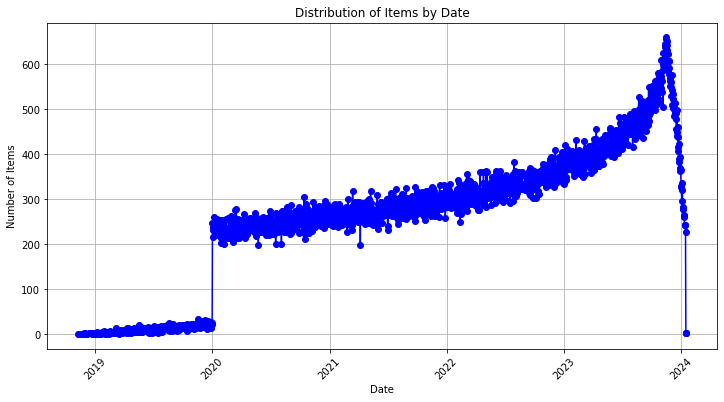

In [15]:
import matplotlib.pyplot as plt

# 'created_at' 칼럼에서 날짜만 추출
df_inventory_items['date'] = df_inventory_items['created_at'].dt.date

# 날짜별 데이터 개수 계산
date_counts = df_inventory_items['date'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
date_counts.plot(marker='o', linestyle='-', color='b')
plt.title('Distribution of Items by Date')
plt.xlabel('Date')
plt.ylabel('Number of Items')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


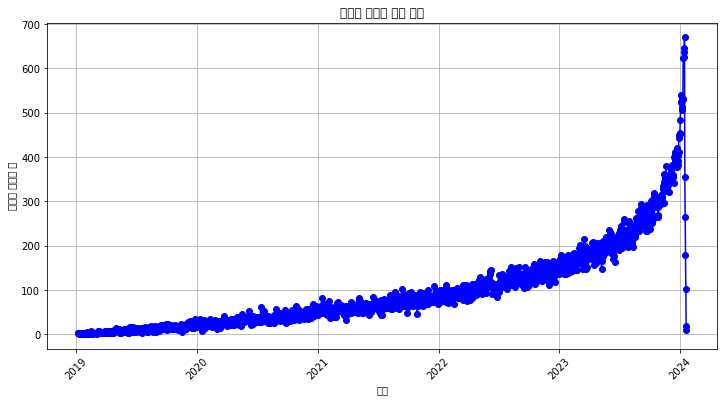

In [16]:
# 'sold_at' 열을 'coerce' 에러 처리 모드로 datetime으로 변환한 새로운 데이터프레임 생성
df_modified = df_inventory_items.copy()
df_modified['sold_at'] = pd.to_datetime(df_modified['sold_at'], errors='coerce')

# 결측값이 있는 행 삭제한 새로운 데이터프레임 생성
df_modified = df_modified.dropna(subset=['sold_at'])

# 'sold_at' 열에서 날짜만 추출
df_modified['date_sold'] = df_modified['sold_at'].dt.date

# 날짜별 아이템 판매 데이터 개수 계산
date_sold_counts = df_modified['date_sold'].value_counts().sort_index()

# 그래프 그리기
plt.figure(figsize=(12, 6))
date_sold_counts.plot(marker='o', linestyle='-', color='b')
plt.title('날짜별 아이템 판매 분포')
plt.xlabel('날짜')
plt.ylabel('판매된 아이템 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## df_order_items

In [17]:
df_order_items

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02
...,...,...,...,...,...,...,...,...,...,...,...
181754,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00
181755,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaN,NaN,999.00
181756,62986,43364,34691,23546,169937,Shipped,2023-02-26 00:38:43+00:00,2023-02-25 06:53:00+00:00,NaN,NaN,999.00
181757,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaN,NaN,999.00


In [18]:
column_names = df_order_items.columns

for column in column_names:
    value_counts = df_order_items[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
152013    1
160536    1
26117     1
27247     1
35738     1
         ..
123933    1
124128    1
125909    1
127832    1
143759    1
Name: count, Length: 181759, dtype: int64

Value counts for order_id:
order_id
551       4
70304     4
106023    4
106407    4
93518     4
         ..
21230     1
21000     1
20626     1
20230     1
98984     1
Name: count, Length: 125226, dtype: int64

Value counts for user_id:
user_id
32996    14
80546    13
80952    13
46712    12
34249    12
         ..
2623      1
5221      1
11082     1
13303     1
5325      1
Name: count, Length: 80044, dtype: int64

Value counts for product_id:
product_id
18795    21
17045    19
21842    19
25209    18
27192    18
         ..
5367      1
23736     1
26444     1
16733     1
8094      1
Name: count, Length: 29046, dtype: int64

Value counts for inventory_item_id:
inventory_item_id
410368    1
433356    1
70444     1
73461     1
96419     1
         ..
334537    1
335065    1
339879    1
345072

## df_orders

In [19]:
df_orders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
125221,125196,99972,Shipped,M,2022-06-25 11:56:00+00:00,NaN,2022-06-28 08:24:00+00:00,NaN,1
125222,125199,99975,Shipped,M,2022-07-20 02:19:00+00:00,NaN,2022-07-22 11:08:00+00:00,NaN,4
125223,125208,99983,Shipped,M,2022-03-14 15:06:00+00:00,NaN,2022-03-17 05:15:00+00:00,NaN,1
125224,125210,99983,Shipped,M,2023-03-01 15:06:00+00:00,NaN,2023-03-02 10:50:00+00:00,NaN,2


In [20]:
column_names = df_orders.columns

for column in column_names:
    value_counts = df_orders[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for order_id:
order_id
8         1
90804     1
90795     1
90793     1
90790     1
         ..
83118     1
83109     1
83101     1
83033     1
125224    1
Name: count, Length: 125226, dtype: int64

Value counts for user_id:
user_id
32645    4
76789    4
76821    4
76834    4
76836    4
        ..
29213    1
29229    1
29231    1
29255    1
99999    1
Name: count, Length: 80044, dtype: int64

Value counts for status:
status
Shipped       37577
Complete      31354
Processing    25156
Cancelled     18609
Returned      12530
Name: count, dtype: int64

Value counts for gender:
gender
F    62701
M    62525
Name: count, dtype: int64

Value counts for created_at:
created_at
2024-01-17 06:56:00+00:00           6
2024-01-15 11:28:00+00:00           5
2023-12-23 06:12:00+00:00           5
2024-01-17 18:01:46.667763+00:00    4
2024-01-17 17:55:21.096187+00:00    4
                                   ..
2022-04-10 07:09:00+00:00           1
2023-02-11 11:50:00+00:00           1
2022-06-

## df_products

In [21]:
df_products

,id,cost,category,name,brand,retail_price,department,sku,distribution_center_id
0,13842,2.51875,Accessories,Low Profile Dyed Cotton Twill Cap - Navy W39S55D,MG,6.25,Women,EBD58B8A3F1D72F4206201DA62FB1204,1
1,13928,2.33835,Accessories,Low Profile Dyed Cotton Twill Cap - Putty W39S55D,MG,5.95,Women,2EAC42424D12436BDD6A5B8A88480CC3,1
2,14115,4.87956,Accessories,Enzyme Regular Solid Army Caps-Black W35S45D,MG,10.99,Women,EE364229B2791D1EF9355708EFF0BA34,1
3,14157,4.64877,Accessories,Enzyme Regular Solid Army Caps-Olive W35S45D (...,MG,10.99,Women,00BD13095D06C20B11A2993CA419D16B,1
4,14273,6.50793,Accessories,Washed Canvas Ivy Cap - Black W11S64C,MG,15.99,Women,F531DC20FDE20B7ADF3A73F52B71D0AF,1
...,...,...,...,...,...,...,...,...,...
29115,5676,12.42338,Pants & Capris,WHAT GOES AROUND COMES AROUND Women's Colette ...,What Goes Around Comes Around,24.17,Women,3A01FC0853EBEBA94FDE4D1CC6FB842A,10
29116,6538,13.67500,Shorts,WHAT GOES AROUND COMES AROUND Women's Mimi Shorts,What Goes Around Comes Around,25.00,Women,741A0099C9AC04C7BFC822CAF7C7459F,10
29117,6712,12.40000,Shorts,WHAT GOES AROUND COMES AROUND Women's Fifi Short,What Goes Around Comes Around,25.00,Women,5726DAF2C9EE0F955ECA58291C26D2F3,10
29118,6821,13.47500,Shorts,WHAT GOES AROUND COMES AROUND Women's Ferguson...,What Goes Around Comes Around,25.00,Women,BA0A4D6ECEA3E9E126DD3B6D77291C97,10


In [22]:
column_names = df_products.columns

for column in column_names:
    value_counts = df_products[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
13842    1
19905    1
5575     1
5434     1
5422     1
        ..
8214     1
8212     1
8205     1
8196     1
7809     1
Name: count, Length: 29120, dtype: int64

Value counts for cost:
cost
13.550000     10
10.750000      9
11.450000      8
12.050000      8
12.775000      7
              ..
52.080000      1
105.966001     1
106.676187     1
55.924000      1
101.841000     1
Name: count, Length: 26375, dtype: int64

Value counts for category:
category
Intimates                        2363
Jeans                            1999
Tops & Tees                      1868
Fashion Hoodies & Sweatshirts    1866
Swim                             1798
Sleep & Lounge                   1771
Shorts                           1765
Sweaters                         1737
Accessories                      1559
Active                           1432
Outerwear & Coats                1420
Underwear                        1088
Pants                            1041
Dresses                   

In [23]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['category'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 26


In [24]:
# 'category' 열의 고유한 값 개수를 확인합니다.
unique_categories = df_products['name'].nunique()
print("고유한 카테고리의 개수:", unique_categories)

고유한 카테고리의 개수: 27309


## df_users

In [25]:
df_users

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
0,457,Timothy,Bush,timothybush@example.net,65,M,Acre,87620 Johnson Hills,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2022-07-19 13:51:00+00:00
1,6578,Elizabeth,Martinez,elizabethmartinez@example.com,34,F,Acre,1705 Nielsen Land,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2023-11-08 18:49:00+00:00
2,36280,Christopher,Mendoza,christophermendoza@example.net,13,M,Acre,125 Turner Isle Apt. 264,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Email,2019-08-24 06:10:00+00:00
3,60193,Jimmy,Conner,jimmyconner@example.com,64,M,Acre,0966 Jose Branch Apt. 008,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-02-15 11:26:00+00:00
4,64231,Natasha,Wilson,natashawilson@example.net,25,F,Acre,20798 Phillip Trail Apt. 392,69917-400,Rio Branco,Brasil,-9.945568,-67.835610,Search,2020-03-13 06:45:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,93247,Crystal,Williams,crystalwilliams@example.com,36,F,Île-de-France,984 Brady Branch,77120,Beautheil-Saints,France,48.789740,3.095796,Search,2021-02-13 01:36:00+00:00
99996,59110,Daniel,Griffin,danielgriffin@example.org,12,M,Île-de-France,89560 Phillips Lakes Apt. 604,77160,Chenoise-Cucharmoy,France,48.589783,3.243343,Organic,2022-09-01 12:01:00+00:00
99997,57045,Olivia,Wiley,oliviawiley@example.org,53,F,Île-de-France,749 Ronald Forge,77320,Choisy-en-Brie,France,48.763993,3.319993,Search,2021-06-19 11:39:00+00:00
99998,73312,Emily,Bird,emilybird@example.org,16,F,Île-de-France,78117 Anderson Oval,77320,Choisy-en-Brie,France,48.763993,3.319993,Search,2023-08-08 16:24:00+00:00


In [26]:
column_names = df_users.columns

for column in column_names:
    value_counts = df_users[column].value_counts(dropna=False)
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for id:
id
457      1
49561    1
1729     1
866      1
38443    1
        ..
55509    1
53432    1
52692    1
52389    1
77764    1
Name: count, Length: 100000, dtype: int64

Value counts for first_name:
first_name
Michael     2319
James       1475
David       1440
Jennifer    1420
John        1382
            ... 
Tami           9
Darin          9
Gilbert        8
Gene           6
Terrence       5
Name: count, Length: 690, dtype: int64

Value counts for last_name:
last_name
Smith       2194
Johnson     1628
Williams    1378
Brown       1266
Jones       1204
            ... 
Shea          22
Murillo       22
Mayo          21
Hinton        21
Mcknight      20
Name: count, Length: 1000, dtype: int64

Value counts for email:
email
michaelsmith@example.org          23
johnsmith@example.net             18
michaeldavis@example.org          18
williamsmith@example.org          16
williamsmith@example.net          15
                                  ..
tashablake@example.org     

In [27]:
filtered_df = df_users[df_users['email'] == 'michaeldavis@example.org']
filtered_df

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,country,latitude,longitude,traffic_source,created_at
8699,47063,Michael,Davis,michaeldavis@example.org,44,M,Beijing,2213 Denise Plain Apt. 270,100024,Huaibei,China,39.918773,116.575721,Facebook,2024-01-01 00:17:00+00:00
12077,55034,Michael,Davis,michaeldavis@example.org,67,M,California,29178 Smith Lodge Suite 715,90016,Los Angeles,United States,34.028709,-118.354248,Search,2021-06-08 02:22:00+00:00
15298,14187,Michael,Davis,michaeldavis@example.org,55,M,Ceará,246 Williams Forks,60810-670,Fortaleza,Brasil,-3.824307,-38.521437,Search,2022-04-22 13:24:00+00:00
18059,59503,Michael,Davis,michaeldavis@example.org,28,M,Comunidad Valenciana,5133 Becker Creek Apt. 570,3184,Torrevieja,Spain,38.020815,-0.689472,Search,2023-09-10 02:34:00+00:00
20589,69240,Michael,Davis,michaeldavis@example.org,62,M,England,7229 Finley Port,CT14,Deal,United Kingdom,51.220903,1.355952,Search,2020-02-29 11:00:00+00:00
28012,28124,Michael,Davis,michaeldavis@example.org,60,M,Fujian,2743 Ellen Squares,350323,Changchun,China,25.734532,119.413464,Search,2022-03-10 11:15:00+00:00
30281,85779,Michael,Davis,michaeldavis@example.org,33,M,Guangdong,68365 Brandon Stravenue Suite 276,525121,Wenzhou,China,21.669359,110.654633,Search,2019-12-06 05:17:00+00:00
38528,24769,Michael,Davis,michaeldavis@example.org,57,M,Gyeonggi-do,887 Hess Roads Apt. 520,467-860,Icheon City,South Korea,37.273158,127.506922,Organic,2023-09-20 09:19:00+00:00
39316,85611,Michael,Davis,michaeldavis@example.org,56,M,Hauts-de-France,1475 Sandoval Cliffs Apt. 160,59110,La Madeleine,France,50.654324,3.069975,Search,2023-06-22 18:00:00+00:00
71654,10447,Michael,Davis,michaeldavis@example.org,37,M,Pernambuco,67776 Sandra Wall,55580-000,Sirinhaém,Brasil,-8.569359,-35.173508,Organic,2019-05-18 04:31:00+00:00


In [28]:
df_distribution_centers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10 non-null     int64  
 1   name       10 non-null     object 
 2   latitude   10 non-null     float64
 3   longitude  10 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 448.0+ bytes


In [29]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              100000 non-null  int64  
 1   first_name      100000 non-null  object 
 2   last_name       100000 non-null  object 
 3   email           100000 non-null  object 
 4   age             100000 non-null  int64  
 5   gender          100000 non-null  object 
 6   state           100000 non-null  object 
 7   street_address  100000 non-null  object 
 8   postal_code     100000 non-null  object 
 9   city            99042 non-null   object 
 10  country         100000 non-null  object 
 11  latitude        100000 non-null  float64
 12  longitude       100000 non-null  float64
 13  traffic_source  100000 non-null  object 
 14  created_at      100000 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 11.4+ MB


In [30]:
df_users.isna().sum()

id                  0
first_name          0
last_name           0
email               0
age                 0
gender              0
state               0
street_address      0
postal_code         0
city              958
country             0
latitude            0
longitude           0
traffic_source      0
created_at          0
dtype: int64

# Order Fulfillment Analysis
주문 처리 분석을 수행하기 위해 다음 단계를 따를 수 있습니다:

1. **주문 처리 시간 분석**:
   - 주문 항목이 생성된 시간과 배송된 시간 간의 차이를 계산하여 각 주문의 처리 시간을 구합니다.
   - 처리 시간의 평균, 중앙값, 최소값, 최대값 등을 계산하여 주문 처리 시간의 분포를 이해합니다.
   - 다양한 기준에 따라 주문 처리 시간을 분류하고 비교합니다. 예를 들어, 제품 카테고리, 주문량 등에 따른 주문 처리 시간을 분석할 수 있습니다.

2. **주문 상태 분석**:
   - 주문 상태를 확인하고 주문이 처리되는 과정을 이해합니다. 주문 상태에는 보류, 배송, 배송 완료, 반품 등이 포함될 수 있습니다.
   - 주문 상태의 비율을 계산하여 각 상태의 중요성을 이해하고 주문 처리 프로세스의 현재 상태를 파악합니다.

3. **시각화 및 시간 경과 분석**:
   - 주문 처리 시간 및 상태에 대한 시각적 분석을 수행합니다. 이를 통해 주문 처리에 소요되는 시간이나 각 주문 상태의 변화를 쉽게 파악할 수 있습니다.
   - 시계열 그래프를 사용하여 주문 처리 시간이나 상태의 시간 경과에 따른 추세를 확인합니다. 이를 통해 특정 기간에 주문 처리에 영향을 미치는 요인을 파악할 수 있습니다.

4. **패턴 및 문제점 식별**:
   - 주문 처리 시간이나 상태에 영향을 미치는 요인을 분석하여 문제점이나 병목 현상을 식별합니다.
   - 지연의 주요 원인이나 반품이 많이 발생하는 제품 카테고리 등을 파악하여 개선이 필요한 부분을 식별합니다.

5. **개선 방안 제안**:
   - 분석 결과를 바탕으로 주문 처리 프로세스를 개선하는 방안을 제안합니다. 예를 들어, 특정 제품의 재고를 늘리거나 처리 시간을 단축시키는 등의 조치를 취할 수 있습니다.
   - 고객 경험을 개선하고 주문 처리 과정의 효율성을 향상시킬 수 있는 전략을 개발합니다.

이러한 단계를 통해 주문 처리 과정을 효율적으로 분석하고 개선하여 고객 만족도를 높이고 비용을 절감할 수 있습니다.

주문 처리 시간 및 상태를 이해하기 위해 `order_items.csv` 및 `orders.csv`를 분석하는 방법은 다음과 같습니다:

1. **데이터 병합**: `order_id`를 기준으로 `order_items.csv`와 `orders.csv`를 병합합니다.

2. **처리 시간 계산**: 주문 항목이 처리되는 데 걸리는 시간을 계산합니다. 이는 `created_at` 및 `shipped_at` 타임스탬프의 차이로 구할 수 있습니다. 이를 통해 주문이 얼마나 빨리 처리되고 배송되는지에 대한 통찰력을 얻을 수 있습니다.

3. **처리 상태 분석**: 병합된 데이터셋에서 `status` 열을 조사하여 각 주문 항목의 처리 상태를 이해합니다. 이 열은 주문 항목이 보류 중인지, 배송되었는지, 배송되었는지, 반환되었는지를 나타냅니다.

4. **데이터 시각화**: 히스토그램이나 라인 차트와 같은 시각화를 만들어 처리 시간의 분포와 각 처리 상태의 주문 비율을 시각적으로 표현합니다. 이를 통해 처리 프로세스에서의 병목 현상이나 지연 사항을 식별할 수 있습니다.

5. **트렌드 파악**: 데이터에서 피크 처리 시간이나 지연 사유와 같은 트렌드나 패턴을 찾습니다. 이 분석은 주문 처리 과정을 최적화하고 고객 만족도를 향상시키는 데 도움이 됩니다.

6. **지표 비교**: 다른 제품 카테고리, 유통 센터 또는 시간대별로 처리 지표를 비교하여 개선할 부분을 식별하고 리소스를 최적화합니다.

이러한 분석을 통해 주문 처리 과정에 대한 가치 있는 통찰력을 얻고 효율성을 향상시키고 고객 경험을 개선할 수 있습니다.

In [31]:
df_orders

,order_id,user_id,status,gender,created_at,returned_at,shipped_at,delivered_at,num_of_item
0,8,5,Cancelled,F,2022-10-20 10:03:00+00:00,NaN,NaN,NaN,3
1,60,44,Cancelled,F,2023-01-20 02:12:00+00:00,NaN,NaN,NaN,1
2,64,46,Cancelled,F,2021-12-06 09:11:00+00:00,NaN,NaN,NaN,1
3,89,65,Cancelled,F,2020-08-13 09:58:00+00:00,NaN,NaN,NaN,1
4,102,76,Cancelled,F,2023-01-17 08:17:00+00:00,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...
125221,125196,99972,Shipped,M,2022-06-25 11:56:00+00:00,NaN,2022-06-28 08:24:00+00:00,NaN,1
125222,125199,99975,Shipped,M,2022-07-20 02:19:00+00:00,NaN,2022-07-22 11:08:00+00:00,NaN,4
125223,125208,99983,Shipped,M,2022-03-14 15:06:00+00:00,NaN,2022-03-17 05:15:00+00:00,NaN,1
125224,125210,99983,Shipped,M,2023-03-01 15:06:00+00:00,NaN,2023-03-02 10:50:00+00:00,NaN,2


In [34]:
df_orders.isnull().sum()

order_id             0
user_id              0
status               0
gender               0
created_at           0
returned_at     112696
shipped_at       43765
delivered_at     81342
num_of_item          0
dtype: int64

In [38]:
df_orders['order_id'].value_counts().sort_index()

order_id
1         1
2         1
3         1
4         1
5         1
         ..
125222    1
125223    1
125224    1
125225    1
125226    1
Name: count, Length: 125226, dtype: int64

In [41]:
df_order_items['order_id'].value_counts().sort_index()

order_id
1         3
2         1
3         1
4         1
5         1
         ..
125222    1
125223    1
125224    2
125225    1
125226    1
Name: count, Length: 125226, dtype: int64

In [35]:
df_order_items.isnull().sum()

id                        0
order_id                  0
user_id                   0
product_id                0
inventory_item_id         0
status                    0
created_at                0
shipped_at            63478
delivered_at         117918
returned_at          163527
sale_price                0
dtype: int64

In [32]:
df_order_items

,id,order_id,user_id,product_id,inventory_item_id,status,created_at,shipped_at,delivered_at,returned_at,sale_price
0,152013,104663,83582,14235,410368,Cancelled,2023-05-07 06:08:40+00:00,NaN,NaN,NaN,0.02
1,40993,28204,22551,14235,110590,Complete,2023-03-14 03:47:21+00:00,2023-03-15 22:57:00+00:00,2023-03-18 01:08:00+00:00,NaN,0.02
2,51224,35223,28215,14235,138236,Complete,2023-12-05 13:25:30+00:00,2023-12-06 01:20:00+00:00,2023-12-10 10:04:00+00:00,NaN,0.02
3,36717,25278,20165,14235,99072,Shipped,2023-12-22 20:48:19+00:00,2023-12-24 16:44:00+00:00,NaN,NaN,0.02
4,131061,90241,71954,14235,353798,Shipped,2022-06-19 16:57:59+00:00,2022-06-19 19:29:00+00:00,NaN,NaN,0.02
...,...,...,...,...,...,...,...,...,...,...,...
181754,9674,6679,5325,24447,26095,Returned,2020-12-23 00:05:01+00:00,2020-12-25 22:54:00+00:00,2020-12-28 07:08:00+00:00,2020-12-30 22:43:00+00:00,999.00
181755,7801,5416,4283,24447,21078,Shipped,2022-01-12 23:51:07+00:00,2022-01-10 03:42:00+00:00,NaN,NaN,999.00
181756,62986,43364,34691,23546,169937,Shipped,2023-02-26 00:38:43+00:00,2023-02-25 06:53:00+00:00,NaN,NaN,999.00
181757,106577,73418,58623,24447,287560,Shipped,2023-11-12 02:41:02+00:00,2023-11-14 20:44:00+00:00,NaN,NaN,999.00
